<a href="https://colab.research.google.com/github/valerio-unifei/UNIFEI-IA-Aulas/blob/main/UNIFEI_IA_TR4_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado de Máquina Não Supervisionado

## Dataset

Download e leitura do CSV do dataset ABALONE.
Conversão 

In [23]:
from sklearn.datasets import fetch_covtype
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(12,12)})

#https://datahub.io/machine-learning/abalone
ds = pd.read_csv('https://datahub.io/machine-learning/abalone/r/abalone.csv')

ds.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Conversão do atributo 'Sex' para categoria

In [24]:
# troca atributo de sexo de (M, F, I) => (2, 0, 1)
ds['Sex'] = ds['Sex'].astype('category').cat.codes
ds.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Extração de atributos do dataset para técnicas de aprendizagem

In [13]:
X = ds[ds.columns[:-1]].values
X.shape

(4177, 8)

Correlação entre os atributos

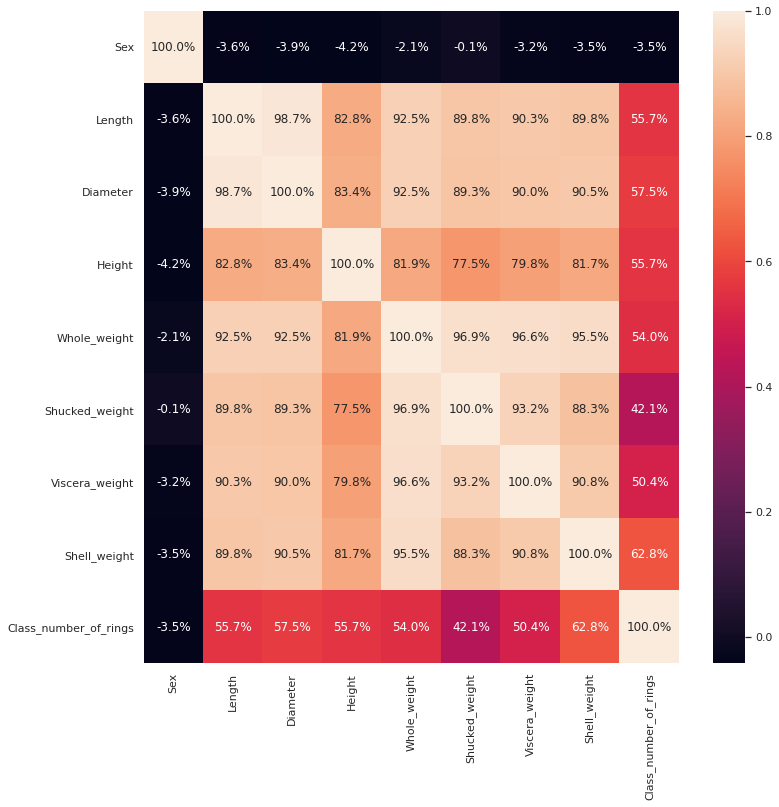

In [15]:
sns.heatmap(ds.corr(), annot=True,fmt='.1%')

Classes existentes no tutor e extração do 'y_real' para comparação com os grupos.

Classes = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29}


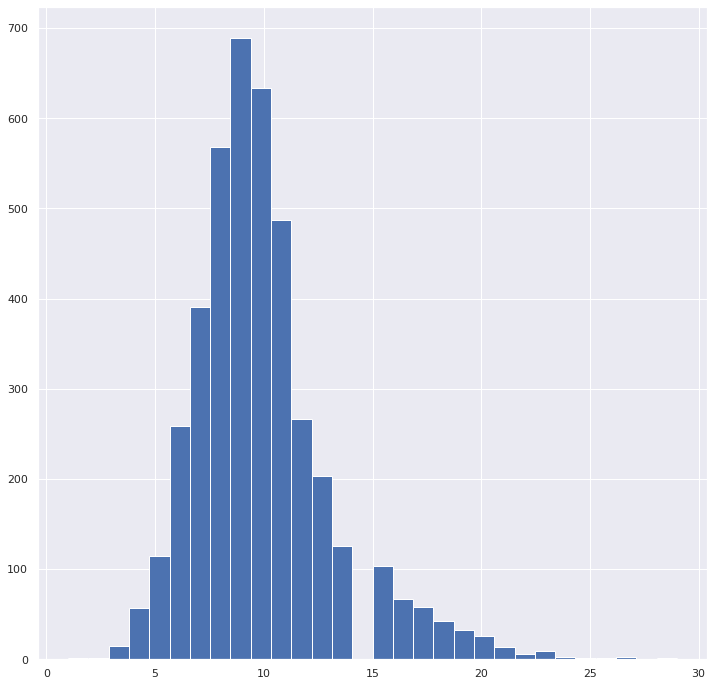

In [14]:
y_real = ds[ds.columns[-1]].values
ds[ds.columns[-1]].hist(bins=30)

print(f'Classes = {set(y_real)}')

O dataset 'Abalone' tem alto grau de correlação entre suas colunas, principalmente as dimensões da ostra.

## Agrupamento (*Clustering*) com FCM

Fuzzy-C-Means (FCM) para agrupar os dados, é uma versão K-Means com lógica difusa.

Para saber mais:

https://towardsdatascience.com/fuzzy-c-means-clustering-is-it-better-than-k-means-clustering-448a0aba1ee7


In [5]:
!pip install fuzzy-c-means

## Agrupamentos

In [16]:
resultados = []

COM TUTOR
 Completeness Score = 0.14
 V Measure Score = 0.16
SEM TUTOR
 Calinski Harabasz Score = 10991.035068918987
 Davies Bouldin Score = 0.8771


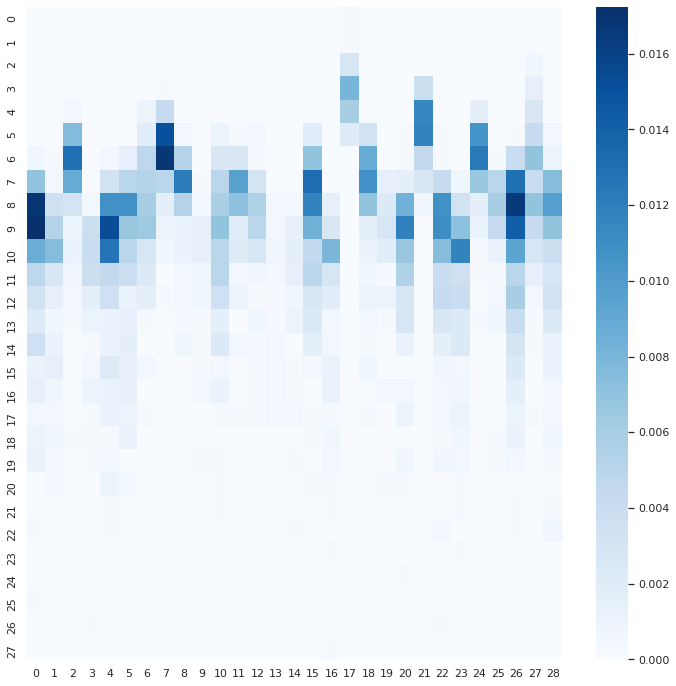

In [17]:
from fcmeans import FCM
from sklearn.metrics import completeness_score, v_measure_score, cluster, calinski_harabasz_score, davies_bouldin_score

X_base = X

fcm = FCM(n_clusters=29)
fcm.fit(X_base)

y_prev1 = fcm.predict(X_base)

ctm = cluster.contingency_matrix(y_real,y_prev1)
sns.heatmap(ctm/np.sum(ctm), annot=False,fmt='.1%', cmap='Blues')

cns = completeness_score(y_real,y_prev1)
vms = v_measure_score(y_real,y_prev1)
chs = calinski_harabasz_score(X_base,y_prev1)
dbs = davies_bouldin_score(X_base,y_prev1)

resultados.append( [ 'Puro',cns,vms,chs,dbs ])

print('COM TUTOR')
print(f' Completeness Score = {cns:.2}')
print(f' V Measure Score = {vms:.2}')
print('SEM TUTOR')
print(f' Calinski Harabasz Score = {chs}')
print(f' Davies Bouldin Score = {dbs:.4}')

COM TUTOR
 Completeness Score = 0.14
 V Measure Score = 0.16
SEM TUTOR
 Calinski Harabasz Score = 13816.714966970658
 Davies Bouldin Score = 1.023


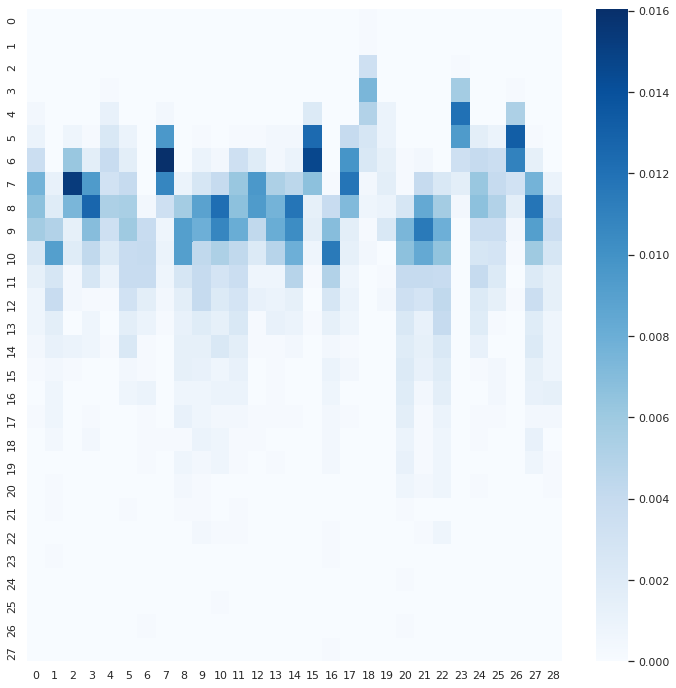

In [18]:
from fcmeans import FCM
from sklearn.metrics import completeness_score, v_measure_score, cluster, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import Normalizer

norm = Normalizer()
X_base = norm.transform(X)

fcm = FCM(n_clusters=29)
fcm.fit(X_base)

y_prev1 = fcm.predict(X_base)

ctm = cluster.contingency_matrix(y_real,y_prev1)
sns.heatmap(ctm/np.sum(ctm), annot=False,fmt='.1%', cmap='Blues')

cns = completeness_score(y_real,y_prev1)
vms = v_measure_score(y_real,y_prev1)
chs = calinski_harabasz_score(X_base,y_prev1)
dbs = davies_bouldin_score(X_base,y_prev1)

resultados.append( [ 'Normalizado',cns,vms,chs,dbs ])

print('COM TUTOR')
print(f' Completeness Score = {cns:.2}')
print(f' V Measure Score = {vms:.2}')
print('SEM TUTOR')
print(f' Calinski Harabasz Score = {chs}')
print(f' Davies Bouldin Score = {dbs:.4}')

COM TUTOR
 Completeness Score = 0.16
 V Measure Score = 0.15
SEM TUTOR
 Calinski Harabasz Score = 517.7848415438459
 Davies Bouldin Score = 0.7015


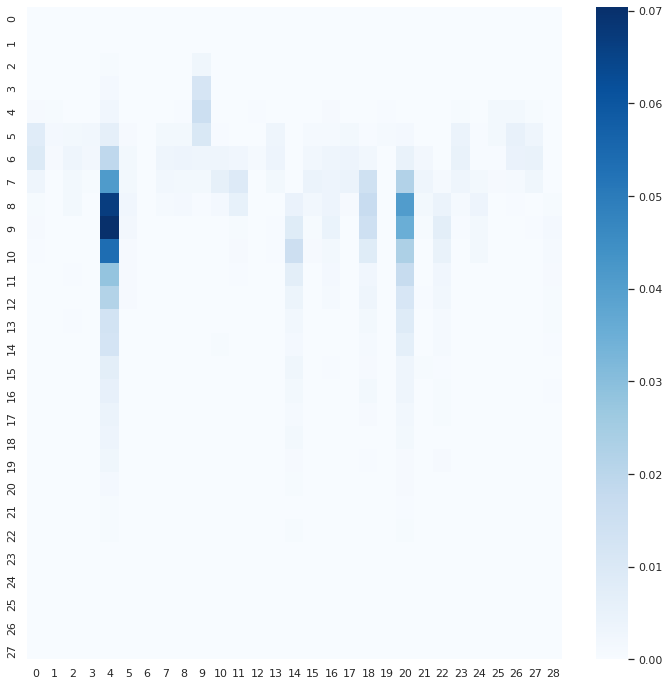

In [19]:
from fcmeans import FCM
from sklearn.metrics import completeness_score, v_measure_score, cluster, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import Normalizer
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=5)
X_base = lle.fit_transform(X)

fcm = FCM(n_clusters=29)
fcm.fit(X_base)

y_prev1 = fcm.predict(X_base)

ctm = cluster.contingency_matrix(y_real,y_prev1)
sns.heatmap(ctm/np.sum(ctm), annot=False,fmt='.1%', cmap='Blues')

cns = completeness_score(y_real,y_prev1)
vms = v_measure_score(y_real,y_prev1)
chs = calinski_harabasz_score(X_base,y_prev1)
dbs = davies_bouldin_score(X_base,y_prev1)

resultados.append( [ 'LLE',cns,vms,chs,dbs ])

print('COM TUTOR')
print(f' Completeness Score = {cns:.2}')
print(f' V Measure Score = {vms:.2}')
print('SEM TUTOR')
print(f' Calinski Harabasz Score = {chs}')
print(f' Davies Bouldin Score = {dbs:.4}')

COM TUTOR
 Completeness Score = 0.14
 V Measure Score = 0.13
SEM TUTOR
 Calinski Harabasz Score = 991.8388821913212
 Davies Bouldin Score = 0.6368


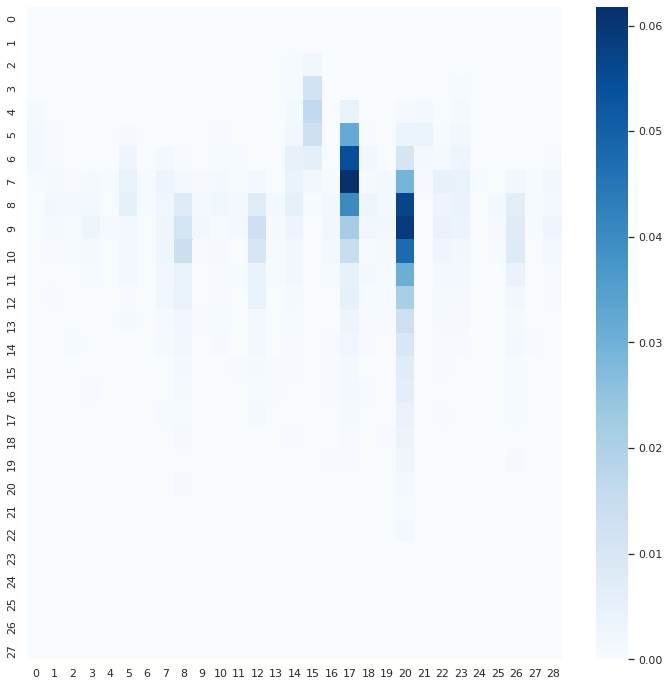

In [20]:
from fcmeans import FCM
from sklearn.metrics import completeness_score, v_measure_score, cluster, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import Normalizer
from sklearn.manifold import LocallyLinearEmbedding

norm = Normalizer()
Xn = norm.transform(X)

lle = LocallyLinearEmbedding(n_components=5)
X_base = lle.fit_transform(Xn)

fcm = FCM(n_clusters=29)
fcm.fit(X_base)

y_prev1 = fcm.predict(X_base)

ctm = cluster.contingency_matrix(y_real,y_prev1)
sns.heatmap(ctm/np.sum(ctm), annot=False,fmt='.1%', cmap='Blues')

cns = completeness_score(y_real,y_prev1)
vms = v_measure_score(y_real,y_prev1)
chs = calinski_harabasz_score(X_base,y_prev1)
dbs = davies_bouldin_score(X_base,y_prev1)

resultados.append( [ 'Norm+LLE',cns,vms,chs,dbs ])

print('COM TUTOR')
print(f' Completeness Score = {cns:.2}')
print(f' V Measure Score = {vms:.2}')
print('SEM TUTOR')
print(f' Calinski Harabasz Score = {chs}')
print(f' Davies Bouldin Score = {dbs:.4}')

# Conclusão

## Diferenças com redução de dimensão

In [22]:
res = pd.DataFrame(resultados, columns=['Nome','Completeness','V Measure','Calinski Harabasz','Davies Bouldin'])
res

,Nome,Completeness,V Measure,Calinski Harabasz,Davies Bouldin
0,Puro,0.142448,0.160455,10991.035069,0.877149
1,Normalizado,0.140023,0.159913,13816.714967,1.023320
2,LLE,0.159205,0.154371,517.784842,0.701489
3,Norm+LLE,0.135373,0.130791,991.838882,0.636849


A normalização ajudou na qualidade dos grupos aumentando sua distância e densidade, mas prejudicou a similaridade dos grupos com os valores do tutor original.

A redução de dimensionalidade por *LocallyLinearEmbedding* , onde os atributos foram reduzidos de 8 para 5 contribuiu com a similaridade dos grupos com os valores do tutor do Abalone. Esta melhora possivelmente tem ligação à correlação superior a 70% da maioria dos atributos de tamanho do Abalone, que cria atributos com pouca informação, sendo concentrada pela decomposição em *LLE*, além da redução do espaço de busca.

A associação entre a normalização e o *LocallyLinearEmbedding* não rendeu resultados bons, nem em qualidade dos grupos nem em similaridade com o tutor.